In [30]:
import csv
from datetime import datetime



In [31]:
filename = "trip_data_5.csv"


1. What datetime range does your data cover?  How many rows are there total?


In [32]:


pickup_col = "pickup_datetime"
dropoff_col = "dropoff_datetime"

with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    pickup_col = next((h for h in header if "pickup" in h.lower() and "time" in h.lower()), pickup_col)
    dropoff_col = next((h for h in header if "drop" in h.lower() and "time" in h.lower()), dropoff_col)

    pickup_idx = header.index(pickup_col)
    dropoff_idx = header.index(dropoff_col)

    total_rows = 0
    min_dt = None
    max_dt = None

    for row in reader:
        total_rows += 1
        try:
            d = datetime.strptime(row[pickup_idx], "%Y-%m-%d %H:%M:%S")
        except Exception:
            try:
                d = datetime.strptime(row[pickup_idx], "%m/%d/%Y %H:%M:%S")
            except:
                d = None
        if d:
            if not min_dt or d < min_dt:
                min_dt = d
            if not max_dt or d > max_dt:
                max_dt = d

print(" Total rows:", total_rows)
print("datetime range:", min_dt, "to", max_dt)


 Total rows: 15285049
datetime range: 2013-05-01 00:00:00 to 2013-05-31 23:59:59


2. What are the field names?  Give descriptions for each field.

In [33]:
with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)

print("Total fields:", len(header))
print("Field names:")
for h in header:
    print("-", h)

Total fields: 14
Field names:
- medallion
-  hack_license
-  vendor_id
-  rate_code
-  store_and_fwd_flag
-  pickup_datetime
-  dropoff_datetime
-  passenger_count
-  trip_time_in_secs
-  trip_distance
-  pickup_longitude
-  pickup_latitude
-  dropoff_longitude
-  dropoff_latitude


In [34]:

field_descriptions = {
    "medallion": "Unique ID for each taxi cab.",
    "hack_license": "Unique identifier for the taxi driver’s license.",
    "vendor_id": "Code identifying the vendor associated with the trip (e.g., VTS or CMT).",
    "rate_code": "Numeric code indicating the rate type used for the trip.",
    "store_and_fwd_flag": "Flag indicating if the trip record was stored temporarily before forwarding ('Y' or 'N').",
    "pickup_datetime": "Date and time when the passenger was picked up.",
    "dropoff_datetime": "Date and time when the passenger was dropped off.",
    "passenger_count": "Number of passengers in the trip.",
    "trip_time_in_secs": "Total trip duration in seconds.",
    "trip_distance": "Total distance traveled in miles.",
    "pickup_longitude": "Longitude coordinate of the pickup location.",
    "pickup_latitude": "Latitude coordinate of the pickup location.",
    "dropoff_longitude": "Longitude coordinate of the dropoff location.",
    "dropoff_latitude": "Latitude coordinate of the dropoff location."
}

print("\nField Descriptions:")
print("-" * 70)
for field in header:
    desc = field_descriptions.get(field, "Description not available")
    print(f"{field:20s} → {desc}")



Field Descriptions:
----------------------------------------------------------------------
medallion            → Unique ID for each taxi cab.
 hack_license        → Description not available
 vendor_id           → Description not available
 rate_code           → Description not available
 store_and_fwd_flag  → Description not available
 pickup_datetime     → Description not available
 dropoff_datetime    → Description not available
 passenger_count     → Description not available
 trip_time_in_secs   → Description not available
 trip_distance       → Description not available
 pickup_longitude    → Description not available
 pickup_latitude     → Description not available
 dropoff_longitude   → Description not available
 dropoff_latitude    → Description not available


3. Give some sample data for each field.

In [35]:
with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    print("Field names:", header, "\n")
    
    print("Sample rows:")
    for i in range(5):  
        row = next(reader)
        print(row)

Field names: ['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude'] 

Sample rows:
['3B1A31779BCE30367D00C6F7911573C0', 'AED0496C937E41C4515D64E851F873AB', 'VTS', '1', '', '2013-05-01 00:04:00', '2013-05-01 00:12:00', '1', '480', '1.34', '-73.982285', '40.772816', '-73.986214', '40.758743']
['61F54249450649B22FCF456774A2F24F', '9D871F2AE5ACF24D04C00484C8ECEF90', 'VTS', '1', '', '2013-05-01 00:03:00', '2013-05-01 00:10:00', '5', '420', '2.60', '-73.963013', '40.711899', '-73.991875', '40.721916']
['160CA9331707228AC5BD584FDBF18B3C', '18F9F1A9E76B707F7D15FC2B39E0BE33', 'VTS', '1', '', '2013-05-01 00:04:00', '2013-05-01 00:10:00', '2', '360', '1.31', '-73.981781', '40.724354', '-73.973755', '40.736893']
['8F1DBE78C521F384A55AD0C77F75545D', 'AC4F234E82B375187FBAF428E10824D8', 'VTS'

4. What MySQL data types / len would you need to store each of the fields?
     (a). int(xx), varchar(xx),date,datetime,bool, decimal(m,d)


In [36]:

def mysql_type_guess(name, sample_value):
    name_lower = name.lower()

    if "datetime" in name_lower:
        return "DATETIME"
    if "date" in name_lower and "time" not in name_lower:
        return "DATE"
    if "latitude" in name_lower or "longitude" in name_lower:
        return "DECIMAL(9,6)"
    if "distance" in name_lower:
        return "DECIMAL(7,2)"
    if "count" in name_lower or "time_in_secs" in name_lower or "rate" in name_lower:
        return "INT(6)"
    if "flag" in name_lower:
        return "CHAR(1)"
    return "VARCHAR(37)"  
with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    sample_row = next(reader)

print(f"{'Field Name':25s} | {'MySQL Data Type'}")
print("-" * 45)
for name, val in zip(header, sample_row):
    t = mysql_type_guess(name, val)
    print(f"{name:25s} | {t}")


Field Name                | MySQL Data Type
---------------------------------------------
medallion                 | VARCHAR(37)
 hack_license             | VARCHAR(37)
 vendor_id                | VARCHAR(37)
 rate_code                | INT(6)
 store_and_fwd_flag       | CHAR(1)
 pickup_datetime          | DATETIME
 dropoff_datetime         | DATETIME
 passenger_count          | INT(6)
 trip_time_in_secs        | INT(6)
 trip_distance            | DECIMAL(7,2)
 pickup_longitude         | DECIMAL(9,6)
 pickup_latitude          | DECIMAL(9,6)
 dropoff_longitude        | DECIMAL(9,6)
 dropoff_latitude         | DECIMAL(9,6)


5. What is the geographic range of your data (min/max - X/Y)?
     (a). Plot this (approximately on a map)

Pickup Latitude:  40.001019 to 41.849045
Pickup Longitude: -74.930862 to -72.199997
Dropoff Latitude: 40.003345 to 41.929165
Dropoff Longitude: -74.933334 to -72.066666
Sample points for map: 35794


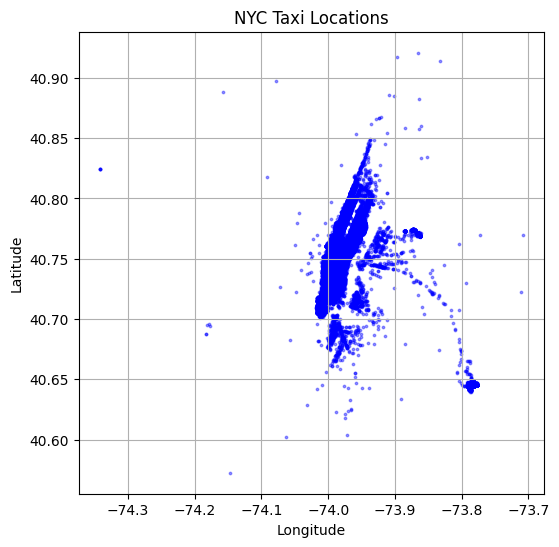

In [37]:

import random
import matplotlib.pyplot as plt

with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)

    pu_lat_col = next((h for h in header if "pickup" in h.lower() and "lat" in h.lower()), None)
    pu_lon_col = next((h for h in header if "pickup" in h.lower() and "lon" in h.lower()), None)
    do_lat_col = next((h for h in header if "dropoff" in h.lower() and "lat" in h.lower()), None)
    do_lon_col = next((h for h in header if "dropoff" in h.lower() and "lon" in h.lower()), None)

    pu_lat_idx = header.index(pu_lat_col)
    pu_lon_idx = header.index(pu_lon_col)
    do_lat_idx = header.index(do_lat_col)
    do_lon_idx = header.index(do_lon_col)

    points = []
    pu_lat_min = pu_lat_max = do_lat_min = do_lat_max = None
    pu_lon_min = pu_lon_max = do_lon_min = do_lon_max = None

    for i, row in enumerate(reader):
        try:
            pu_lat = float(row[pu_lat_idx])
            pu_lon = float(row[pu_lon_idx])
            do_lat = float(row[do_lat_idx])
            do_lon = float(row[do_lon_idx])
            if not (40 <= pu_lat <= 42 and -75 <= pu_lon <= -72):
                continue
            if not (40 <= do_lat <= 42 and -75 <= do_lon <= -72):
                continue
        except:
            continue
        if pu_lat_min is None or pu_lat < pu_lat_min: pu_lat_min = pu_lat
        if pu_lat_max is None or pu_lat > pu_lat_max: pu_lat_max = pu_lat
        if do_lat_min is None or do_lat < do_lat_min: do_lat_min = do_lat
        if do_lat_max is None or do_lat > do_lat_max: do_lat_max = do_lat

        if pu_lon_min is None or pu_lon < pu_lon_min: pu_lon_min = pu_lon
        if pu_lon_max is None or pu_lon > pu_lon_max: pu_lon_max = pu_lon
        if do_lon_min is None or do_lon < do_lon_min: do_lon_min = do_lon
        if do_lon_max is None or do_lon > do_lon_max: do_lon_max = do_lon
        if random.randint(1, 400) == 1:
            points.append((pu_lon, pu_lat))
            
print("Pickup Latitude: ", pu_lat_min, "to", pu_lat_max)
print("Pickup Longitude:", pu_lon_min, "to", pu_lon_max)
print("Dropoff Latitude:", do_lat_min, "to", do_lat_max)
print("Dropoff Longitude:", do_lon_min, "to", do_lon_max)
print("Sample points for map:", len(points))
plt.figure(figsize=(6, 6))
plt.scatter([lon for lon, lat in points], [lat for lon, lat in points],
            s=3, color='blue', alpha=0.4)
plt.title("NYC Taxi Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


6. What is the average overall computed trip distance? (You should use Haversine Distance)
(a). Draw a histogram of the trip distances binned anyway you see fit.


 Total valid trips analyzed: 14470560
Average trip distance: 3.44 km


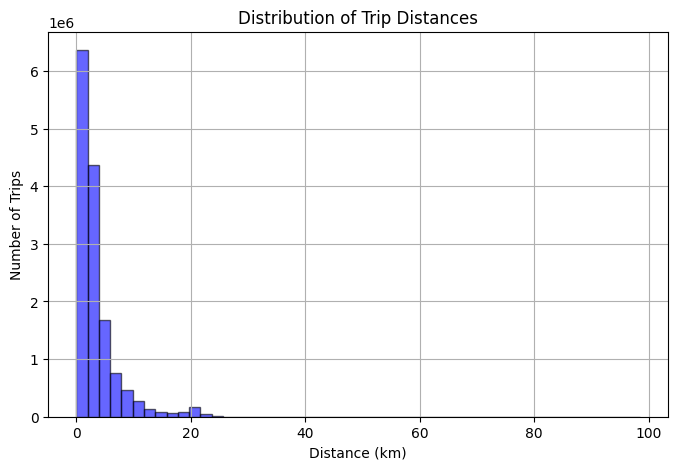

In [38]:

import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

distances = []

with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)

    pu_lat_col = next((h for h in header if "pickup" in h.lower() and "lat" in h.lower()), None)
    pu_lon_col = next((h for h in header if "pickup" in h.lower() and "lon" in h.lower()), None)
    do_lat_col = next((h for h in header if "dropoff" in h.lower() and "lat" in h.lower()), None)
    do_lon_col = next((h for h in header if "dropoff" in h.lower() and "lon" in h.lower()), None)

    pu_lat_idx = header.index(pu_lat_col)
    pu_lon_idx = header.index(pu_lon_col)
    do_lat_idx = header.index(do_lat_col)
    do_lon_idx = header.index(do_lon_col)

    for i, row in enumerate(reader):
        try:
            pu_lat = float(row[pu_lat_idx])
            pu_lon = float(row[pu_lon_idx])
            do_lat = float(row[do_lat_idx])
            do_lon = float(row[do_lon_idx])

            if not (40 <= pu_lat <= 42 and -75 <= pu_lon <= -72):
                continue
            if not (40 <= do_lat <= 42 and -75 <= do_lon <= -72):
                continue
            d = haversine(pu_lat, pu_lon, do_lat, do_lon)
            if d < 100: 
                distances.append(d)
        except:
            continue

print(f" Total valid trips analyzed: {len(distances)}")
if distances:
    print(f"Average trip distance: {sum(distances)/len(distances):.2f} km")

plt.figure(figsize=(8, 5))
plt.hist(distances, bins=50, color="blue", alpha=0.6, edgecolor="black")
plt.title("Distribution of Trip Distances")
plt.xlabel("Distance (km)")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()


7. What are the distinct values for each field? (If applicable)

In [39]:


with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    
    categorical_cols = []
    for i, name in enumerate(header):
        if any(word in name.lower() for word in ["vendor", "rate", "flag", "passenger"]):
            categorical_cols.append((name, i))

    distinct = {col: set() for col, _ in categorical_cols}

    for row in reader:
        for col, idx in categorical_cols:
            if idx < len(row):
                val = row[idx].strip()
                if val != "":
                    distinct[col].add(val)
if distinct:
    for field, values in distinct.items():
        print(f"{field}: {len(values)} distinct values -> {sorted(list(values))[:15]}")
else:
    print("No matching discrete fields found ")


 vendor_id: 2 distinct values -> ['CMT', 'VTS']
 rate_code: 10 distinct values -> ['0', '1', '2', '210', '3', '4', '5', '6', '65', '7']
 store_and_fwd_flag: 2 distinct values -> ['N', 'Y']
 passenger_count: 7 distinct values -> ['0', '1', '2', '3', '4', '5', '6']


8. For other numeric types besides lat and lon, what are the min and max values?

In [40]:


with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    numeric_cols = []
    for i, name in enumerate(header):
        if any(word in name.lower() for word in ["trip_time", "trip_distance", "passenger"]):
            numeric_cols.append((name, i))
    minmax = {n: {"min": None, "max": None} for n, _ in numeric_cols}

    for row in reader:
        for name, idx in numeric_cols:
            try:
                val = float(row[idx])
                if minmax[name]["min"] is None or val < minmax[name]["min"]:
                    minmax[name]["min"] = val
                if minmax[name]["max"] is None or val > minmax[name]["max"]:
                    minmax[name]["max"] = val
            except:
                continue
for field, values in minmax.items():
    print(f"{field}: Min = {values['min']}, Max = {values['max']}")




 passenger_count: Min = 0.0, Max = 6.0
 trip_time_in_secs: Min = 0.0, Max = 10800.0
 trip_distance: Min = 0.0, Max = 100.0


9. Create a chart which shows the average number of passengers each hour of the day. (X axis should have 24 hours)

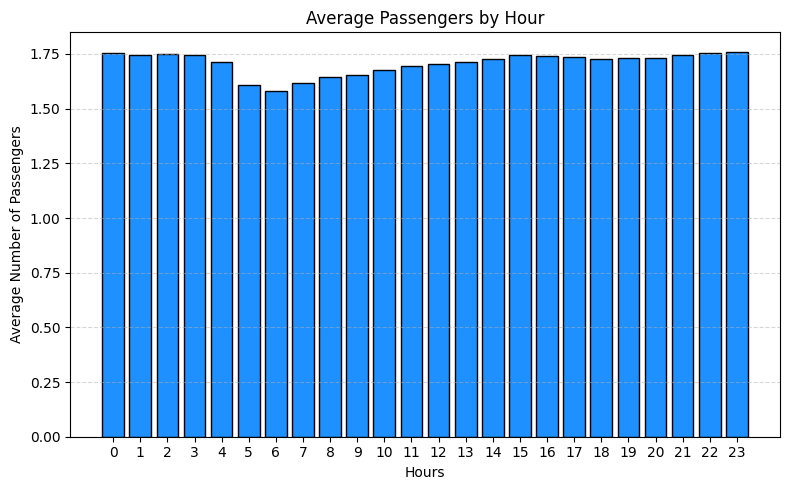

In [41]:


def parse_datetime(dt_str):
    for fmt in ("%Y-%m-%d %H:%M:%S", "%m/%d/%Y %H:%M:%S", "%Y-%m-%dT%H:%M:%S"):
        try:
            return datetime.strptime(dt_str.strip(), fmt)
        except:
            continue
    return None
with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)

    pickup_col = next((h for h in header if "pickup" in h.lower() and "time" in h.lower()), None)
    if pickup_col is None:
        pickup_col = next((h for h in header if "pickup" in h.lower() and "date" in h.lower()), None)

    passenger_col = next((h for h in header if "passenger" in h.lower()), None)
hour_sum = [0.0] * 24
hour_count = [0] * 24

with open(filename, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        try:
            dt = parse_datetime(row[pickup_col])
            passengers = float(row[passenger_col])
            if dt is None or passengers < 0 or passengers > 10:
                continue
            hour = dt.hour
            hour_sum[hour] += passengers
            hour_count[hour] += 1
        except Exception as e:
            continue

hour_avg = [hour_sum[h]/hour_count[h] if hour_count[h] else 0 for h in range(24)]
plt.figure(figsize=(8,5))
plt.bar(range(24), hour_avg, color="dodgerblue", edgecolor="black")
plt.xticks(range(24))
plt.xlabel("Hours")
plt.ylabel("Average Number of Passengers")
plt.title("Average Passengers by Hour")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


10. Create a new CSV file which has only one out of every thousand rows.

In [42]:


input_file = "trip_data_5.csv"
output_file = "trip_data_5_reduced.csv"

keep_every = 1000  

with open(input_file, "r", encoding="utf-8") as infile, open(output_file, "w", newline="", encoding="utf-8") as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    header = next(reader)
    writer.writerow(header)

    count = 0
    kept = 0
    for row in reader:
        count += 1
        if count % keep_every == 0:
            writer.writerow(row)
            kept += 1

print(f" Reduced file created: {output_file}")
print(f"Total rows written: {kept}")


 Reduced file created: trip_data_5_reduced.csv
Total rows written: 15285


11.Repeat step 9 with the reduced dataset and compare the two charts.

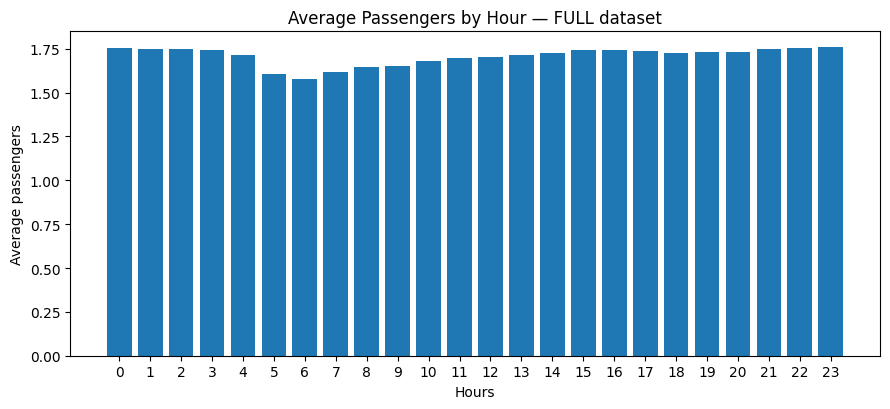

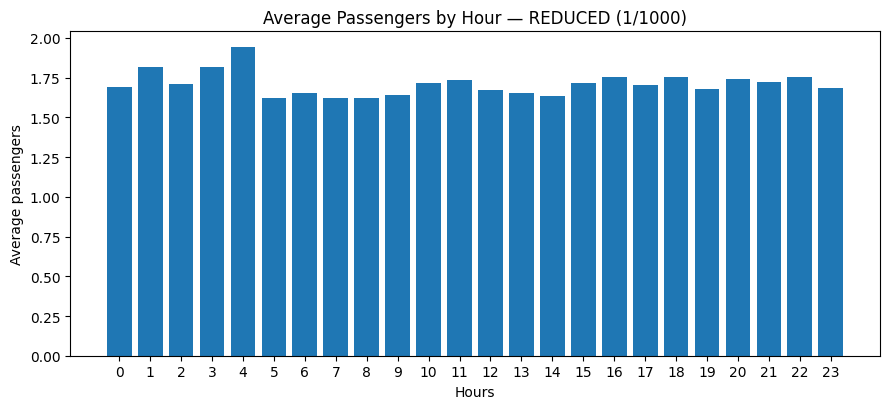

In [43]:


full_file    = "trip_data_5.csv"
reduced_file = "trip_data_5_reduced.csv"

def parse_dt(s):
    for fmt in ("%Y-%m-%d %H:%M:%S", "%m/%d/%Y %H:%M:%S", "%Y-%m-%dT%H:%M:%S"):
        try:
            return datetime.strptime(s.strip(), fmt)
        except:
            pass
    return None

def detect_cols(filename):
    with open(filename, "r", encoding="utf-8") as f:
        r = csv.reader(f)
        header = next(r)
    pickup = next((h for h in header if "pickup" in h.lower() and "time" in h.lower()), None)
    if pickup is None:
        pickup = next((h for h in header if "pickup" in h.lower() and "date" in h.lower()), None)
    passengers = next((h for h in header if "passenger" in h.lower()), None)
    return pickup, passengers

def avg_passengers_by_hour(filename):
    pickup_col, passenger_col = detect_cols(filename)
    hour_sum   = [0.0]*24
    hour_count = [0]*24
    with open(filename, "r", encoding="utf-8") as f:
        rdr = csv.DictReader(f)
        for row in rdr:
            try:
                d = parse_dt(row[pickup_col])
                pc = float(row[passenger_col])
                if d is None or pc < 0 or pc > 10:
                    continue
                h = d.hour
                hour_sum[h] += pc
                hour_count[h] += 1
            except:
                continue
    return [ (hour_sum[h]/hour_count[h]) if hour_count[h] else 0.0 for h in range(24) ], sum(hour_count)

avg_full, n_full       = avg_passengers_by_hour(full_file)
avg_reduced, n_reduced = avg_passengers_by_hour(reduced_file)
plt.figure(figsize=(9,4.2))
plt.bar(range(24), avg_full)
plt.xticks(range(24))
plt.xlabel("Hours")
plt.ylabel("Average passengers")
plt.title("Average Passengers by Hour — FULL dataset")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4.2))
plt.bar(range(24), avg_reduced)
plt.xticks(range(24))
plt.xlabel("Hours")
plt.ylabel("Average passengers")
plt.title("Average Passengers by Hour — REDUCED (1/1000)")
plt.tight_layout()
plt.show()
